<a href="https://colab.research.google.com/github/Durjoy001/Data-Science/blob/main/text_classification_by_using_DecisionTreeClassifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/*.xlsx"
all_file = glob.glob(path)

In [ ]:
all_file

['/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType10.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType1.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType11.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType9.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType3.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType14.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType18.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType17.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType16.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType2.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType5.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType15.xlsx',
 '/content/drive/MyDrive/Colab No

In [ ]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters

In [ ]:
data = pd.concat(data)
data = data.sample(frac = 1)

data

,Unnamed: 0,lyrics,songType
618,2647,সম্পর্ক নাই সম্পর্ক নাই সম্পর্ক নাই সম্পর্ক না...,1
713,3942,পড়েনা চোখের পলক কি তোমার রূপের ঝলক দোহাই লাগে ...,3
338,1142,চলে যেতে যেতে যদি কিছু মনে পড়ে পিছু ফিরে চেও ন...,1
52,3698,সারা রাত জেগে জেগে কত কথা আমি ভাবি পাপড়ি কেন ব...,9
14,772,"তব অচিন্ত্য রূপ-চরিত-মহিমা, নব শোভা, নব ধ্যান ...",14
...,...,...,...
478,2112,তুমি আর ডেকো না। পিছু ডেকো না আমি চলে যাই শুধু...,1
261,1058,কত নিঝুম রাতের মধু স্বপ্নে গেথে আমি আমার এ গান...,3
70,394,তুমি ফিরে এসে দেখো কত বদলে গেছি আমি আগের মতো ক...,1
905,3758,যেটুকু সময় তুমি থাকো পাশে মনে হয় এ দেহে প্রাণ ...,1


In [ ]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [ ]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.tree import DecisionTreeClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',DecisionTreeClassifier()),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

In [ ]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.31 (+/- 0.02)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.35      0.37      0.36       363
           2       0.00      0.00      0.00         7
           3       0.28      0.29      0.28       252
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00        22
           6       0.50      0.18      0.27        33
           7       0.19      0.17      0.18        58
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        15
          11       0.08      0.06      0.06        18
          12       0.03      0.03      0.03        39
          13       0.26      0.34      0.30       225
          14       0.05      0.06      0.05        18
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

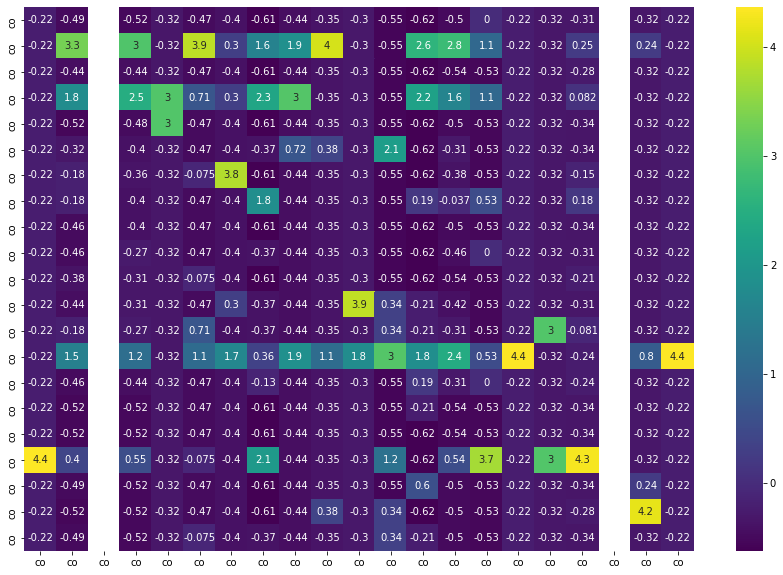

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')
